#GP Noise 

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import math as mt
import pandas as pd
import seaborn as sb

from pandas import HDFStore
from mpl_toolkits.axes_grid1 import make_axes_locatable

from src.lpf_ww import LPFunction as LPFW
from src.lpf_wr import LPFunction as LPFR

from src.core import *

rminitial - expkernel with the same priors as tres                                                                       
rm - matern32kernel with the same priors as tres



In [34]:
pe = pd.Panel(dict(rm = pd.read_hdf('results/pe.h5','bb/rn_maskedmat'),
                   rminitial = pd.read_hdf('results/pe.h5','bb/rn_masked')))

##Histograms for gp_std and gp_log_inv_length

2500 mcmc iterations for rm (matern32)

In [35]:
chains = array(pe.rm.get('tc p rho b k2 e c x u v'.split()).dropna())

In [36]:
chains2 = array(pe.rminitial.get('gp_std gp_log_inv_length'.split()).dropna()).T

(array([  2.00000000e+00,   6.00000000e+00,   2.10000000e+01,
          2.30000000e+01,   4.30000000e+01,   7.70000000e+01,
          1.07000000e+02,   1.51000000e+02,   2.63000000e+02,
          3.42000000e+02,   4.39000000e+02,   6.74000000e+02,
          8.36000000e+02,   1.09800000e+03,   1.38900000e+03,
          1.63800000e+03,   2.00700000e+03,   2.29300000e+03,
          2.74900000e+03,   4.84200000e+03]),
 array([ 0.00064754,  0.00066517,  0.00068279,  0.00070041,  0.00071803,
         0.00073566,  0.00075328,  0.0007709 ,  0.00078853,  0.00080615,
         0.00082377,  0.00084139,  0.00085902,  0.00087664,  0.00089426,
         0.00091189,  0.00092951,  0.00094713,  0.00096475,  0.00098238,
         0.001     ]),
 <a list of 20 Patch objects>)

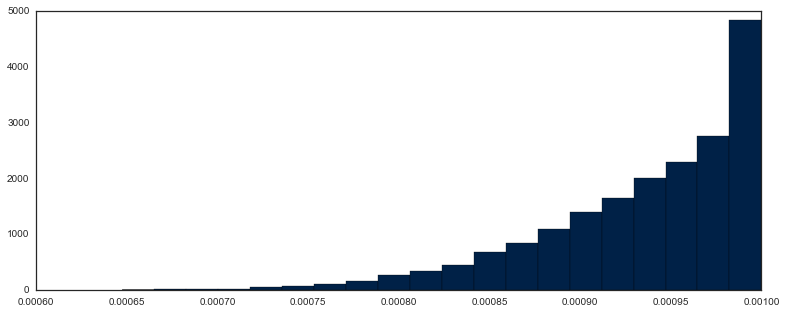

In [37]:
plt.hist(chains2[0,:], bins=20)

(array([    6.,    16.,    71.,   174.,   429.,   874.,  1540.,  2243.,
         2734.,  2950.,  2737.,  2091.,  1391.,   906.,   454.,   236.,
           93.,    39.,    12.,     4.]),
 array([ 2.4446376 ,  2.52744029,  2.61024299,  2.69304569,  2.77584839,
         2.85865109,  2.94145378,  3.02425648,  3.10705918,  3.18986188,
         3.27266457,  3.35546727,  3.43826997,  3.52107267,  3.60387537,
         3.68667806,  3.76948076,  3.85228346,  3.93508616,  4.01788885,
         4.10069155]),
 <a list of 20 Patch objects>)

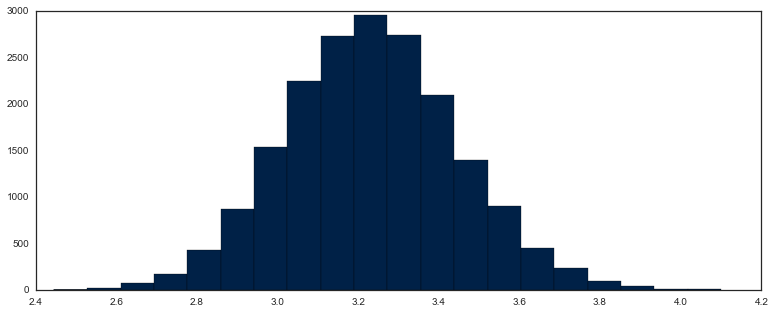

In [38]:
plt.hist(chains2[1,:], bins=20)

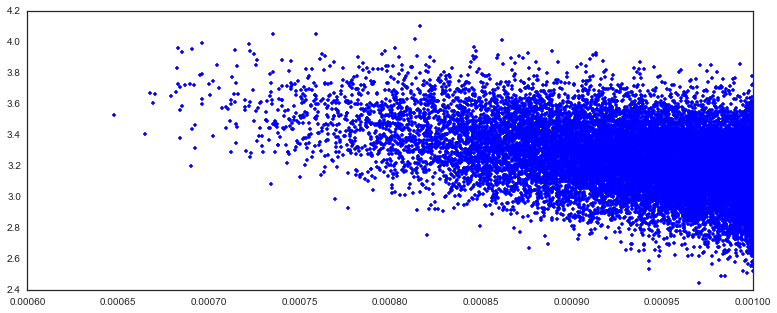

In [39]:
plt.plot(chains2[0,:],chains2[1,:],'b.')    #checking if thy're correlated
plt.show()

##Light Curves 

Most of the code comes from the exo_tutorials notebook

In [40]:
df_aux = pd.read_hdf('results/light_curves.h5', 'aux')
df_lc  = pd.read_hdf('results/light_curves.h5', 'final/bb_masked')
msk = array(df_aux.bad_mask, dtype=np.bool)

lpfw = LPFW(array(df_aux.mjd+0.5)[msk], df_lc.white[msk], df_aux.airmass[msk], 4)
lpfr = LPFR(array(df_aux.mjd+0.5)[msk], df_lc.white[msk], df_aux.airmass[msk], 4)

In [41]:
#Transit Model with residual extinction
flux_md = array([lpfw.compute_lc_model(pv) for pv in chains])
flux_mp = percentile(flux_md, [50,2.5,97.5], 0)

#Transit Model with zero airmass/residual extinction
#flux_mdnoam = array([lpfw.compute_lc_modelnoam(pv) for pv in chains])
#flux_mpnoam = percentile(flux_mdnoam, [50,2.5,97.5], 0)

#basline with residual extinction
flux_bd = array([lpfw.compute_baseline(pv) for pv in chains])
flux_bp = percentile(flux_bd, [50,2.5,97.5], 0)

In [42]:
time       = lpfw.time
flux_o     = lpfw.flux_o.ravel()
flux_m     = flux_mp[0,:]
residuals1  = flux_o - flux_m
#flux_m2     = flux_mpnoam[0,:]
#residuals2  = flux_o - flux_m2

###Transit Model with residual extinction

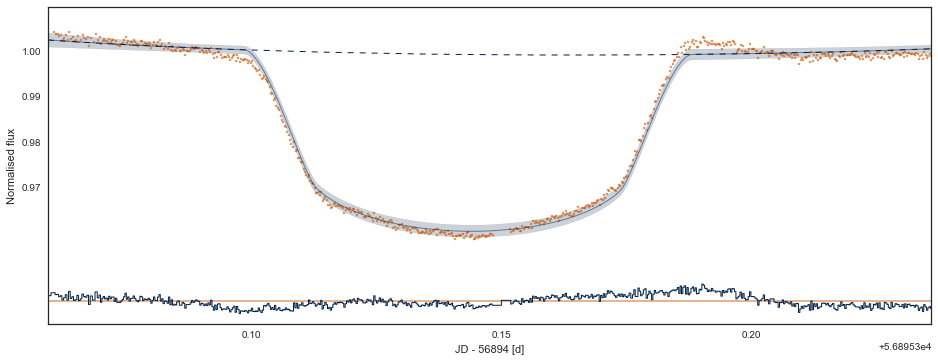

In [43]:
fig,ax = subplots(1,1)
ax.plot(time, flux_o, '.', c=c_bo, alpha=0.25, ms=5.5)
ax.plot(time, flux_o, '.', c=c_bo, alpha=0.5, ms=4.5, markeredgecolor=c_bo)
ax.fill_between(time, *flux_mp[1:,:], alpha=0.2)
ax.plot(time, flux_bp[0,:], '--', c=c_ob, lw=1)
ax.plot(time, flux_mp[0,:], '-', c=c_ob, alpha=0.5, lw=1)
ax.axhline(0.945+residuals1.mean(), ls='-', alpha=0.5, c=c_bo)
ax.plot(time, residuals1 + 0.945, '-', c=c_ob, drawstyle='steps-mid', lw=1)
setp(ax, xlim=time[[0,626]], ylabel='Normalised flux', xlabel='JD - {:d} [d]'.format(int(df_aux.mjd[0])), 
     yticks=[0.97,0.98,0.99,1.0])
fig.tight_layout()

In [44]:
flux_md.shape

(1000, 627)

Plotting all the mcmc results just to see what it looks like.

ValueError: x and y must have same first dimension

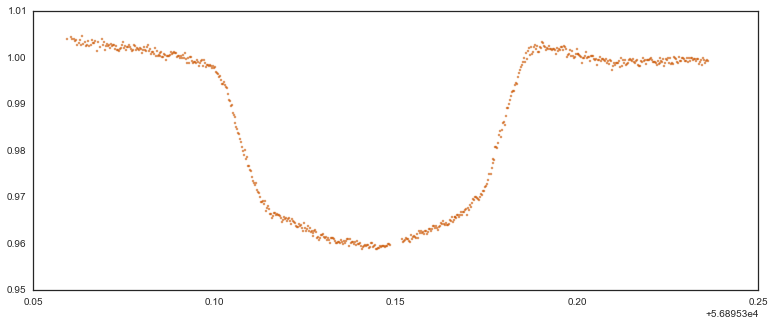

In [45]:
fig,ax = subplots(1,1)
ax.plot(time, flux_o, '.', c=c_bo, alpha=0.25, ms=5.5)
ax.plot(time, flux_o, '.', c=c_bo, alpha=0.5, ms=4.5, markeredgecolor=c_bo)
#ax.fill_between(time, flux_mp[1:,:], alpha=0.2)
#ax.plot(time, flux_bp[0,:], '--', c=c_ob, lw=1)
#ax.plot(time, flux_mp[0,:], '-', c=c_ob, alpha=0.5, lw=1)
ax.plot(array([time,]*4000), flux_md, '.', c=c_ob, alpha=0.75, lw=1)


ax.axhline(0.945+residuals1.mean(), ls='-', alpha=0.5, c=c_bo)
ax.plot(time, residuals1 + 0.945, '-', c=c_ob, drawstyle='steps-mid', lw=1)
setp(ax, xlim=time[[0,626]], ylabel='Normalised flux', xlabel='JD - {:d} [d]'.format(int(df_aux.mjd[0])), 
     yticks=[0.97,0.98,0.99,1.0])
fig.tight_layout()

In [46]:
r1=residuals1
#r2=residuals2
chainsT = chains.T
chains2 = array(pe.rm.get('gp_std gp_log_inv_length'.split()).dropna()).T

In [47]:
from george import GP
from george.kernels import Matern32Kernel

In [48]:
gp = GP(Matern32Kernel(1))
gp.kernel = median(chains2[0])**2*Matern32Kernel(1./10**(median(chains2[1])))
gp.compute(time, median(chainsT[5]))
mu1,cov1=gp.predict(r1,time)
error1=sqrt(diag(cov1))
#mu2,cov2=gp.predict(r2,time)
#error2=sqrt(diag(cov2))

###Residual Models

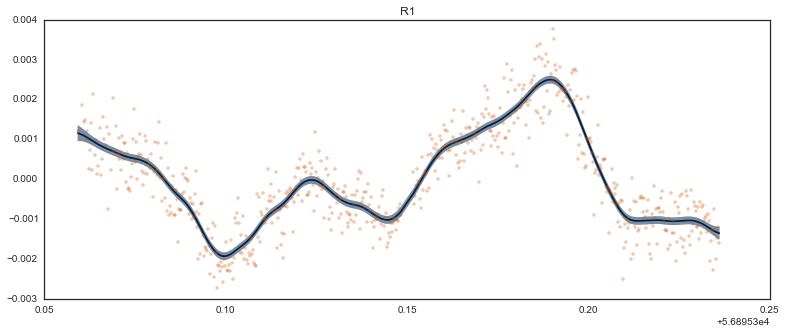

In [49]:
fig,ax = subplots(1,1)
ax.plot(time, mu1, '-', c=c_ob, alpha=1, ms=5.5)  #black: mean of predicted distribution
ax.fill_between(time,mu1-error1 ,mu1+error1 , alpha=0.5)  #grey: +- error on mu
ax.plot(time, r1 ,'.',c=c_bo, alpha=0.3) #orange: residuals 
ax.set_title('R1')

In [26]:
#fig,ax = subplots(1,1)
#ax.plot(time, mu2, '-', c=c_ob, alpha=1, ms=5.5)  #black: mean of predicted distribution
#ax.fill_between(time,mu2-error2 ,mu2+error2 , alpha=0.5)  #grey: +- error on mu
#ax.plot(time, r2 ,'.',c=c_bo, alpha=0.3) #orange: residuals 
#ax.set_title('R2')